### Cargamos las librerías

In [6]:
import pandas as pd
import seaborn as sns
import plotnine as p9
import requests
import io
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cargamos la data preparada

In [7]:
s = requests.get('https://raw.githubusercontent.com/Roybermahe/Prediccion-Accidentes/main/data_preparation.csv').content
data = pd.read_csv(filepath_or_buffer=io.StringIO(s.decode('utf-8')), sep=',', header = 0)
data

,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIASEMANA
0,01-01-2015,09:45:00,Con Heridos,Choque,Vehiculo,0,2,Engativá,Interseccion,JUEVES
1,01-01-2015,13:25:00,Solo Daños,Choque,Vehiculo,0,0,Suba,Tramo de Via,JUEVES
2,01-01-2015,07:15:00,Con Heridos,Volcamiento,NaN,0,1,Ciudad Bolívar,Tramo de Via,JUEVES
3,01-01-2015,20:30:00,Solo Daños,Choque,Vehiculo,0,0,Chapinero,Tramo de Via,JUEVES
4,01-01-2015,12:50:00,Solo Daños,Choque,Vehiculo,0,0,Ciudad Bolívar,Tramo de Via,JUEVES
...,...,...,...,...,...,...,...,...,...,...
150193,31-12-2019,07:00:00,Con Heridos,Choque,Vehiculo,0,2,Barrios Unidos,Tramo de Via,MARTES
150194,31-12-2019,06:17:00,Con Heridos,Choque,Vehiculo,0,1,Kennedy,Tramo de Via,MARTES
150195,31-12-2019,00:30:00,Con Heridos,Choque,Vehiculo,0,1,Fontibón,Tramo de Via,MARTES
150196,31-12-2019,10:35:00,Con Heridos,Choque,Vehiculo,0,2,Tunjuelito,Tramo de Via,MARTES


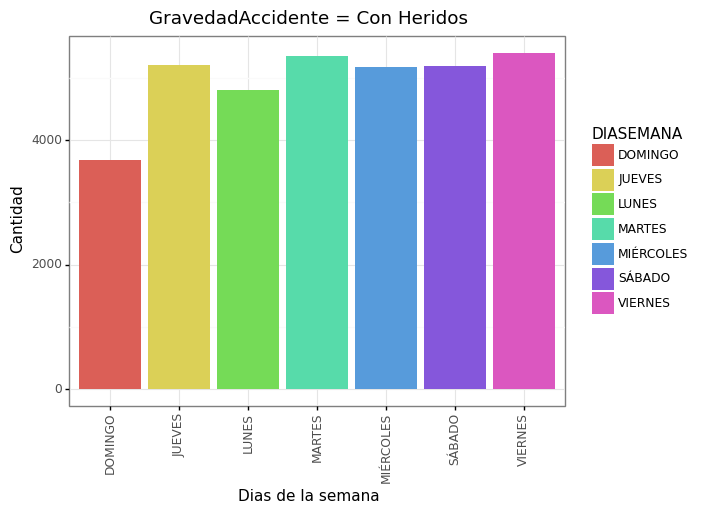

<ggplot: (30914861)>

In [8]:
data_con_heridos = data['GRAVEDAD'] == 'Con Heridos'
datasetHeridos = data[data_con_heridos]
listConHeridos = datasetHeridos['GRAVEDAD'].value_counts().index.tolist()
listConHeridos_Cat = pd.Categorical(datasetHeridos['GRAVEDAD'], categories=listConHeridos)

(p9.ggplot(data=datasetHeridos.assign(listConHeridos_Cat = listConHeridos_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Con Heridos")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

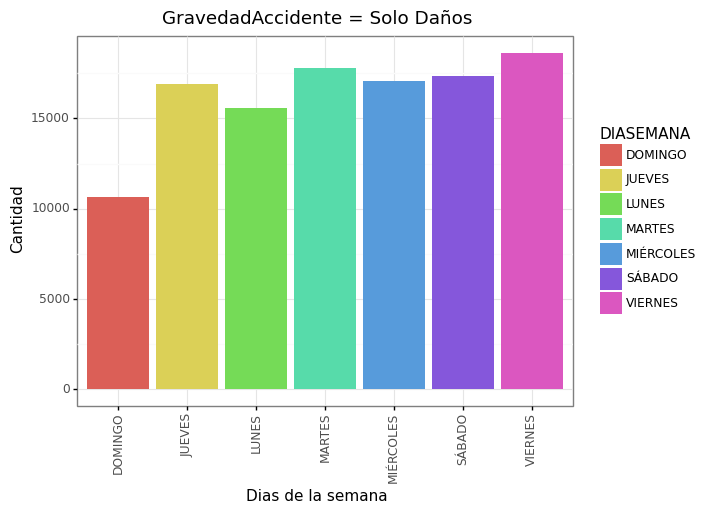

<ggplot: (16705529)>

In [9]:
data_con_daños = data['GRAVEDAD'] == 'Solo Daños'
datasetDaños = data[data_con_daños]
listConDaños = datasetDaños['GRAVEDAD'].value_counts().index.tolist()
listConDaños_Cat = pd.Categorical(datasetDaños['GRAVEDAD'], categories=listConDaños)

(p9.ggplot(data=datasetDaños.assign(listConDaños_Cat = listConDaños_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Solo Daños")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

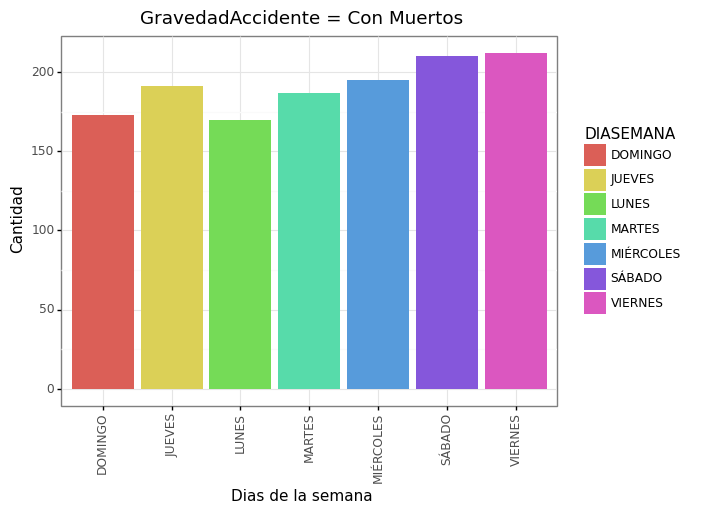

<ggplot: (33959491)>

In [10]:
data_con_muertos = data['GRAVEDAD'] == 'Con Muertos'
datasetMuertos = data[data_con_muertos]
listConMuertos = datasetMuertos['GRAVEDAD'].value_counts().index.tolist()
listConMuertos_Cat = pd.Categorical(datasetMuertos['GRAVEDAD'], categories=listConMuertos)

(p9.ggplot(data=datasetMuertos.assign(listConMuertos_Cat = listConMuertos_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Con Muertos")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)
